In [256]:
!pip install catboost

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import catboost
from catboost import CatBoostClassifier, Pool

In [258]:
df = pd.read_csv("train.csv")

In [259]:
df2 = pd.read_csv("test.csv")

In [260]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [261]:
#col_todrop = df[['CustomerId','Surname']]
#df = df.drop(columns=col_todrop)
#df

In [262]:
for column in df.columns:
    if df[column].isna().any():
       print(f"Column '{column}' has NaN values.")

In [263]:
label_encoder = LabelEncoder()

df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Surname'] = label_encoder.fit_transform(df['Surname'])

df['Geography'] = pd.to_numeric(df['Geography'], errors='coerce')
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')
df['Surname'] = pd.to_numeric(df['Surname'], errors='coerce')


print(df)

            id  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0            0    15674932     1924          668          0       1  33.0   
1            1    15749177     1925          627          0       1  33.0   
2            2    15694510     1178          678          0       1  40.0   
3            3    15741417     1299          581          0       1  34.0   
4            4    15766172      467          716          2       1  33.0   
...        ...         ...      ...          ...        ...     ...   ...   
165029  165029    15667085     1701          667          2       0  33.0   
165030  165030    15665521     1918          792          0       1  35.0   
165031  165031    15664752     1172          565          0       1  31.0   
165032  165032    15689614     1176          554          2       0  30.0   
165033  165033    15732798     2564          850          0       1  31.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0   

In [264]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [265]:
#col_todrop = df2[['CustomerId','Surname']]
#df2 = df2.drop(columns=col_todrop)
#df2

In [266]:
label_encoder = LabelEncoder()

df2['Geography'] = label_encoder.fit_transform(df2['Geography'])
df2['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2['Surname'] = label_encoder.fit_transform(df2['Surname'])

df2['Geography'] = pd.to_numeric(df2['Geography'], errors='coerce')
df2['Gender'] = pd.to_numeric(df2['Gender'], errors='coerce')
df2['Surname'] = pd.to_numeric(df2['Surname'], errors='coerce')


print(df2)

            id  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0       165034    15773898     1482          586          0       0  23.0   
1       165035    15782418     1812          683          0       0  46.0   
2       165036    15807120     1246          656          0       0  34.0   
3       165037    15808905     1832          681          0       1  36.0   
4       165038    15607314     1079          752          1       1  38.0   
...        ...         ...      ...          ...        ...     ...   ...   
110018  275052    15662091     1933          570          2       1  29.0   
110019  275053    15774133      579          575          0       0  36.0   
110020  275054    15728456      410          712          0       1  31.0   
110021  275055    15687541     2656          709          0       0  32.0   
110022  275056    15663942     2457          621          0       0  37.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0   

In [267]:
df2

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [268]:
###Feature Engineering
df['Products_Balance'] = df['NumOfProducts'] * df['Balance']
df2['Products_Balance'] = df2['NumOfProducts'] * df2['Balance']

df['Funds'] = df['EstimatedSalary'] - df['Balance']
df2['Funds'] = df2['EstimatedSalary'] - df2['Balance']


In [269]:
scale_cols = ['Age','CreditScore', 'Balance','EstimatedSalary','Funds']
for c in scale_cols:

    min_value = df[c].min()

    max_value = df[c].max()

    df[c+"_scaled"] = (df[c] - min_value) / (max_value - min_value)

    df2[c+"_scaled"] = (df2[c] - min_value) / (max_value - min_value)

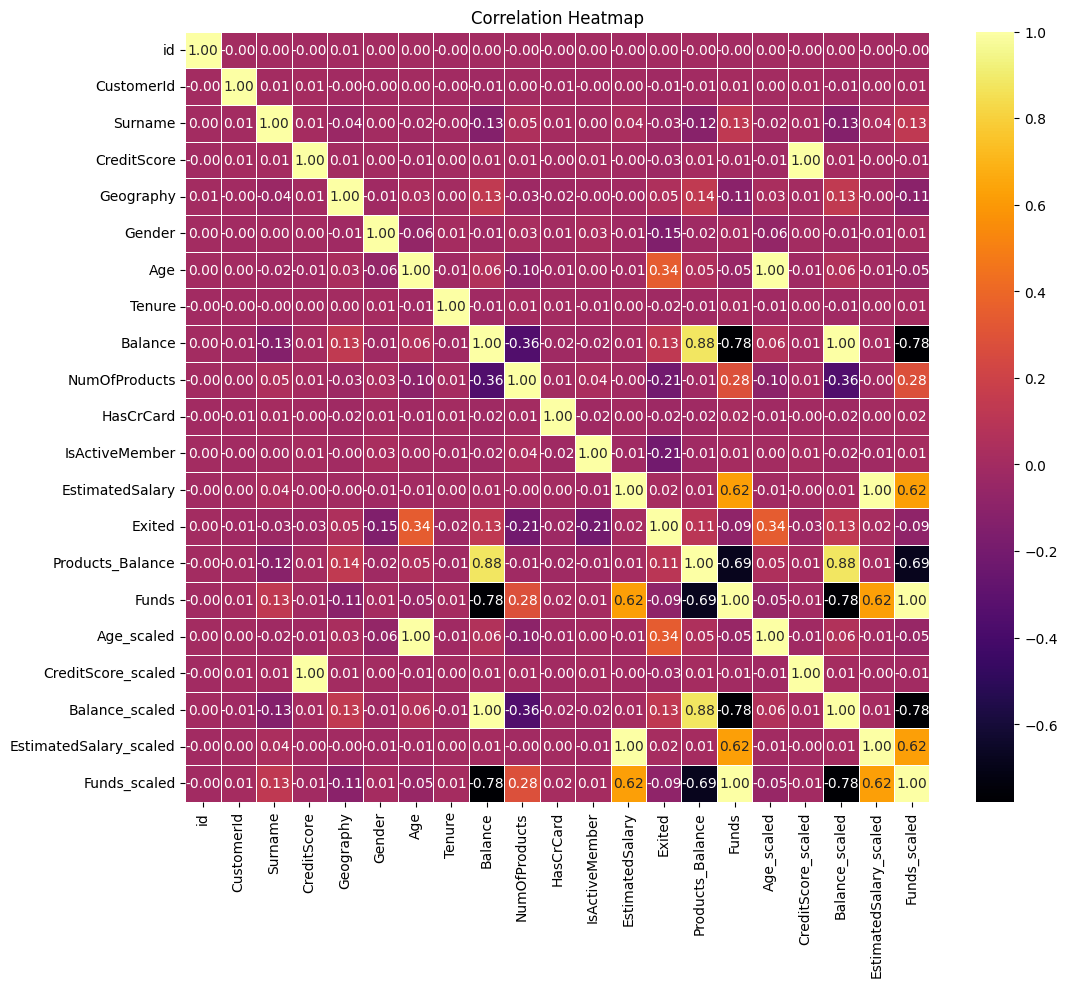

In [270]:
#Correlation Matrix
correlation_matrix = df.corr()

#Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [271]:
#Selecting and X and y
X = df[['Age_scaled','Gender','Balance_scaled','IsActiveMember','NumOfProducts','Geography','Surname','CreditScore_scaled','HasCrCard','EstimatedSalary_scaled','Products_Balance','Funds']]
y = df[['Exited']]

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [345]:
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    eval_metric = 'auc',
    eta=0.25,
    max_depth=4,
    min_child_weight=1,
    subsample=1,
    colsample_bytree=1,
    gamma=0,
    seed=13
)

In [346]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eta=0.25, eval_metric='auc', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [347]:
# Make predictions on the test set using the best LightGBM model
y_pred = xgb_classifier.predict(X_test)
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

ROC-AUC: 0.8909468004305031


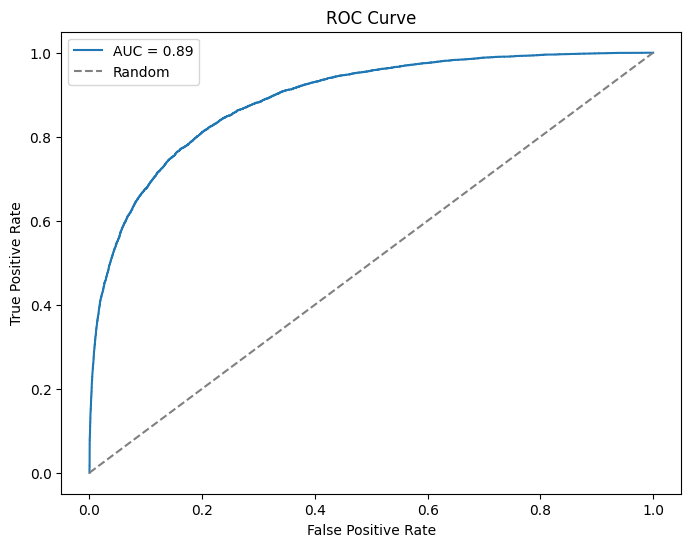

In [348]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [272]:
# Train the model with the best hyperparameters
model = lgb.LGBMClassifier(colsample_bytree=0.8, max_depth=4, n_estimators=111,
               num_leaves=31, subsample=0.4)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 27964, number of negative: 104063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1610
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211805 -> initscore=-1.314079
[LightGBM] [Info] Start training from score -1.314079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMClassifier(colsample_bytree=0.8, max_depth=4, n_estimators=111,
               subsample=0.4)

In [273]:
# Make predictions on the test set using the best LightGBM model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [274]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26050
           1       0.75      0.55      0.63      6957

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



In [275]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8659678250068167


ROC-AUC: 0.8898840643525335


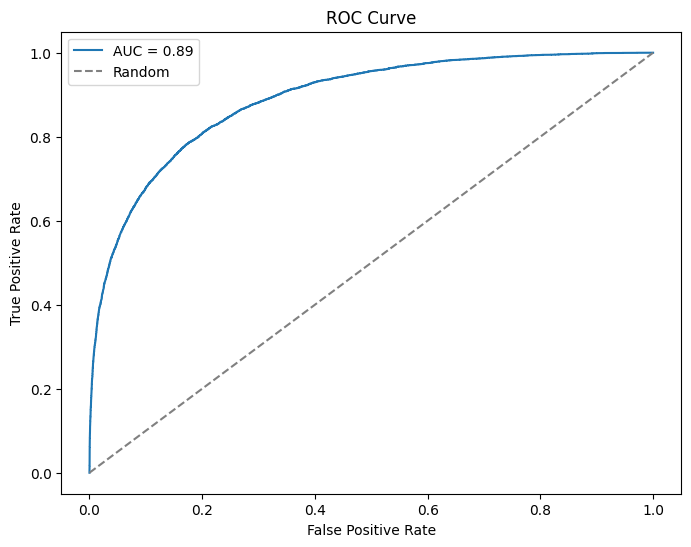

In [276]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [277]:
# Extract feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)

                   Feature  Importance
0               Age_scaled         289
6                  Surname         233
7       CreditScore_scaled         167
2           Balance_scaled         166
4            NumOfProducts         154
9   EstimatedSalary_scaled         136
5                Geography         122
3           IsActiveMember         101
10        Products_Balance          82
11            Funds_scaled          78
1                   Gender          75
8                HasCrCard          38


In [278]:
# Create a CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=150, depth=5, learning_rate=0.1, loss_function='Logloss', eval_metric='AUC')

In [279]:
param_grid = {'iterations': [180, 200], 'depth': [6, 8], 'learning_rate': [0.1, 0.12, 0.15]}
grid_search = GridSearchCV(CatBoostClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_catboost_model = grid_search.best_estimator_

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Streaming output truncated to the last 5000 lines.
21:	learn: 0.3295446	total: 564ms	remaining: 4.56s
22:	learn: 0.3283607	total: 588ms	remaining: 4.53s
23:	learn: 0.3275889	total: 611ms	remaining: 4.48s
24:	learn: 0.3269554	total: 635ms	remaining: 4.45s
25:	learn: 0.3263388	total: 658ms	remaining: 4.4s
26:	learn: 0.3259684	total: 687ms	remaining: 4.4s
27:	learn: 0.3253595	total: 710ms	remaining: 4.36s
28:	learn: 0.3250550	total: 732ms	remaining: 4.32s
29:	learn: 0.3246656	total: 753ms	remaining: 4.27s
30:	learn: 0.3240816	total: 780ms	remaining: 4.25s
31:	learn: 0.3237389	total: 801ms	remaining: 4.21s
32:	learn: 0.3235073	total: 822ms	remaining: 4.16s
33:	learn: 0.3232482	total: 842ms	remaining: 4.11s
34:	learn: 0.3229460	total: 865ms	remaining: 4.08s
35:	learn: 0.3226606	total: 891ms	remaining: 4.06s
36:	learn: 0.3224080	total: 917ms	remaining: 4.04s
37:	learn: 0.3221432	total: 943ms	remaining: 4.02s
38:	learn: 0.3219225	total: 965ms	remaining: 3.98s
39:	learn: 0.3217291	total: 992ms

In [280]:
# Train the CatBoost model
# Assuming you have the best_catboost_model from hyperparameter tuning
best_catboost_model.fit(X_train, y_train, cat_features=['Gender', 'Geography'])



0:	learn: 0.5873722	total: 112ms	remaining: 22.3s
1:	learn: 0.5140514	total: 223ms	remaining: 22.1s
2:	learn: 0.4628481	total: 326ms	remaining: 21.4s
3:	learn: 0.4271744	total: 422ms	remaining: 20.7s
4:	learn: 0.4019778	total: 513ms	remaining: 20s
5:	learn: 0.3840522	total: 637ms	remaining: 20.6s
6:	learn: 0.3705337	total: 734ms	remaining: 20.2s
7:	learn: 0.3609843	total: 839ms	remaining: 20.1s
8:	learn: 0.3528020	total: 951ms	remaining: 20.2s
9:	learn: 0.3469672	total: 1.06s	remaining: 20.1s
10:	learn: 0.3422736	total: 1.15s	remaining: 19.8s
11:	learn: 0.3382006	total: 1.25s	remaining: 19.6s
12:	learn: 0.3354925	total: 1.36s	remaining: 19.6s
13:	learn: 0.3333745	total: 1.45s	remaining: 19.3s
14:	learn: 0.3320667	total: 1.55s	remaining: 19.2s
15:	learn: 0.3303384	total: 1.67s	remaining: 19.2s
16:	learn: 0.3288915	total: 1.77s	remaining: 19.1s
17:	learn: 0.3277621	total: 1.88s	remaining: 19.1s
18:	learn: 0.3268676	total: 1.99s	remaining: 18.9s
19:	learn: 0.3260710	total: 2.08s	remaining

In [281]:
# Make predictions on the test data
y_pred = best_catboost_model.predict(X_test)
y_prob = best_catboost_model.predict_proba(X_test)[:, 1]

In [282]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26050
           1       0.75      0.55      0.64      6957

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



ROC-AUC: 0.8910067657176785


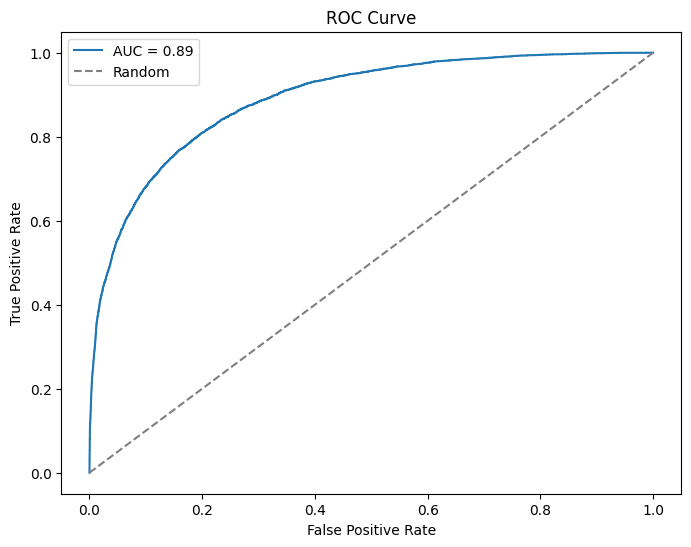

In [283]:
# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [349]:
voting_classifier = VotingClassifier(estimators=[
    ('lgbm', model),
    ('catboost', best_catboost_model),('xgb', xgb_classifier)
], voting='soft')

In [350]:
# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 27964, number of negative: 104063
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1610
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211805 -> initscore=-1.314079
[LightGBM] [Info] Start training from score -1.314079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(colsample_bytree=0.8, max_depth=4,
                                             n_estimators=111, subsample=0.4)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7cc418b8de10>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, device=None,
                                            early_stopping_rounds...
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [351]:
# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8669373163268398


ROC-AUC: 0.8910249304957214


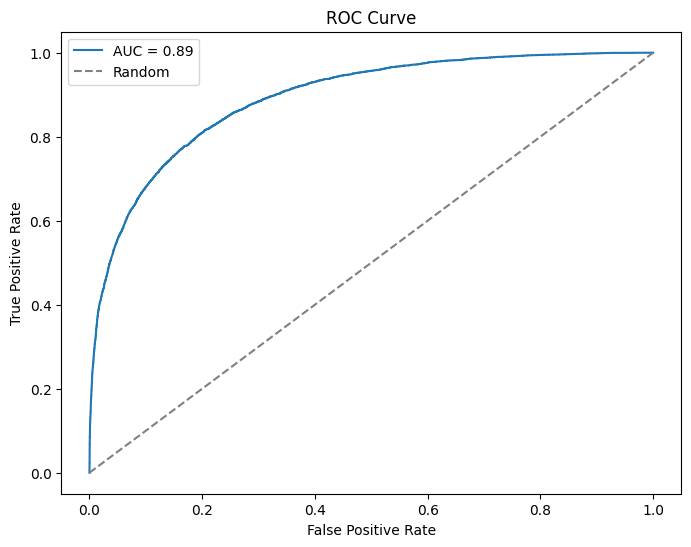

In [352]:
y_prob = voting_classifier.predict_proba(X_test)[:,1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [353]:
X_train.shape

(132027, 12)

In [354]:
df2.shape

(110023, 20)

In [355]:
df2

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Products_Balance,Funds,Age_scaled,CreditScore_scaled,Balance_scaled,EstimatedSalary_scaled,Funds_scaled
0,165034,15773898,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.00,160976.75,0.067568,0.472,0.000000,0.804903,0.906377
1,165035,15782418,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.00,72549.27,0.378378,0.666,0.000000,0.362723,0.694186
2,165036,15807120,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.00,138882.09,0.216216,0.612,0.000000,0.694419,0.853359
3,165037,15808905,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.00,113931.57,0.243243,0.662,0.000000,0.569654,0.793487
4,165038,15607314,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,121263.62,18167.38,0.270270,0.804,0.483318,0.697164,0.563690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,116099.82,31987.80,0.148649,0.440,0.462737,0.740451,0.596854
110019,275053,15774133,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,178032.53,-135850.85,0.243243,0.450,0.709581,0.210871,0.194106
110020,275054,15728456,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,0.00,16287.38,0.175676,0.724,0.000000,0.081387,0.559179
110021,275055,15687541,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,0.00,158816.58,0.189189,0.718,0.000000,0.794101,0.901194


In [356]:
df2 = df2[X_train.columns]

In [357]:
df2.shape

(110023, 12)

In [358]:
# Use the trained CatBoost model to predict the target variable
y_pred_new = voting_classifier.predict(df2)

In [359]:
y_pred_new = voting_classifier.predict_proba(df2)[:, 1]

In [360]:
df2 = pd.read_csv('test.csv')

In [361]:
df2['Exited'] = y_pred_new
# Display or save the results
print(df2[['id','Exited']])
final_df = df2[['id','Exited']]

            id    Exited
0       165034  0.026594
1       165035  0.827127
2       165036  0.027513
3       165037  0.280120
4       165038  0.386428
...        ...       ...
110018  275052  0.037895
110019  275053  0.090970
110020  275054  0.020467
110021  275055  0.173968
110022  275056  0.187590

[110023 rows x 2 columns]


In [362]:
# Save the DataFrame to a CSV file
output_filename = 'submissionsv7.csv'
final_df.to_csv(output_filename, index=False)